# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [9]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 2.0.10 which is incompatible.


**Unzip the environment (headless)**

In [3]:
!unzip Tennis_Linux_NoVis.zip

Archive:  Tennis_Linux_NoVis.zip
   creating: Tennis_Linux_NoVis/
  inflating: Tennis_Linux_NoVis/Tennis.x86_64  
  inflating: Tennis_Linux_NoVis/Tennis.x86  
   creating: Tennis_Linux_NoVis/Tennis_Data/
   creating: Tennis_Linux_NoVis/Tennis_Data/Managed/
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/UnityEngine.AudioModule.dll.mdb  
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/UnityEngine.InputModule.dll.mdb  
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/UnityEngine.TerrainPhysicsModule.dll  
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/Mono.Posix.dll  
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/UnityEngine.UnityWebRequestAudioModule.dll.mdb  
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/UnityEngine.SpriteMaskModule.dll  
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/UnityEngine.UnityConnectModule.dll.mdb  
  inflating: Tennis_Linux_NoVis/Tennis_Data/Managed/UnityEngine.CrashReportingModule.dll  
  inflating: Tennis_Linux_NoVis/Tennis_

The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [10]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [11]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [12]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [8]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.09500000160187483
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677
Total score (averaged over agents) this episode: -0.004999999888241291


When finished, you can close the environment.

In [8]:
#env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [4]:
import numpy as np
from maddpg_agent import Agent
from collections import deque
import random
import time
import torch
import matplotlib.pyplot as plt

In [10]:
GOAL_AVG_SCORE = 0.5
CONSEC_EPISODES = 100
PRINT_EVERY = 100
ADD_NOISE = True
STOP_FLAG = 300
EPISODES = 2000
MAX_T = 2000
TRAIN_MODE = True

In [11]:
def maddpg(episodes= EPISODES, max_timesteps= MAX_T, train_mode= TRAIN_MODE):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        episodes (int)      : maximum number of training episodes
        max_timesteps (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    scores_window = deque(maxlen=CONSEC_EPISODES)
    scores_all = []
    moving_average = []
    best_score = -np.inf
    best_episode = 0
    already_solved = False    

    for i_episode in range(1, episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, ADD_NOISE)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            agent_0.step(states, actions, rewards[0], next_states, done, 0) # agent 1 learns
            agent_1.step(states, actions, rewards[1], next_states, done, 1) # agent 2 learns
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # save best score                        
        if ep_best_score > best_score:
            best_score = ep_best_score
            best_episode = i_episode
        
        # print the results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tAverage: {:.3f}'.format(
                i_episode-PRINT_EVERY, i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))

        # determine if the env meets the avg score goal
        if moving_average[-1] >= GOAL_AVG_SCORE:
                print('Environment solved in number {:d} episodes \
                \n Average: {:.3f} over past {:d} episodes'.format(
                    i_episode-CONSEC_EPISODES, moving_average[-1], CONSEC_EPISODES))
                # save the weights model
                torch.save(agent_0.actor_local.state_dict(), 'cp_actor_0.pth')
                torch.save(agent_0.critic_local.state_dict(), 'cp_critic_0.pth')
                torch.save(agent_1.actor_local.state_dict(), 'cp_actor_1.pth')
                torch.save(agent_1.critic_local.state_dict(), 'cp_critic_1.pth')
                break
        else:
                continue
            
    return scores_all, moving_average

In [23]:
def get_actions(states, add_noise):
    action_0 = agent_0.act(states, add_noise)    # agent 0 chooses an action
    action_1 = agent_1.act(states, add_noise)    # agent 1 chooses an action
    return np.concatenate((action_0, action_1), axis=0).flatten()

**Init agents**

In [13]:
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

In [14]:
from workspace_utils import active_session
 
with active_session():
    scores, moving_averages = maddpg()

Episodes 0000-0100	Max Reward: 0.200	Average: 0.018
Episodes 0100-0200	Max Reward: 0.300	Average: 0.052
Episodes 0200-0300	Max Reward: 0.500	Average: 0.062
Episodes 0300-0400	Max Reward: 1.200	Average: 0.087
Episodes 0400-0500	Max Reward: 0.400	Average: 0.092
Episodes 0500-0600	Max Reward: 0.600	Average: 0.105
Episodes 0600-0700	Max Reward: 0.600	Average: 0.091
Episodes 0700-0800	Max Reward: 0.700	Average: 0.097
Episodes 0800-0900	Max Reward: 0.600	Average: 0.109
Episodes 0900-1000	Max Reward: 0.800	Average: 0.172
Episodes 1000-1100	Max Reward: 1.000	Average: 0.201
Episodes 1100-1200	Max Reward: 3.300	Average: 0.335
Episodes 1200-1300	Max Reward: 1.600	Average: 0.228
Episodes 1300-1400	Max Reward: 1.300	Average: 0.254
Environment solved in number 1399 episodes                 
 Average: 0.521 over past 100 episodes


### Data Visualization

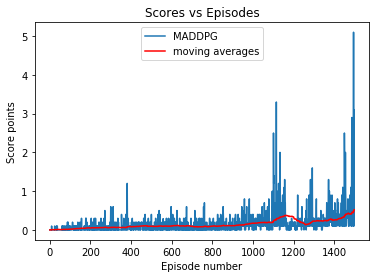

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.title("Scores vs Episodes")
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), moving_averages, c='r', label='moving averages')
plt.ylabel('Score points')
plt.xlabel('Episode number')
plt.legend(loc='upper center');
plt.show()

## Testing agent

**Constants**

In [18]:
N_EPISODES = 100
MAX_T = 2000
PRINT_EVERY = 10
ADD_NOISE = False
TRAIN_MODE = False

**Init agents**

In [19]:
agent_0 = Agent(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agent(state_size, action_size, num_agents=1, random_seed=0)

In [20]:
agent_0_weights = 'cp_actor_0.pth'
agent_1_weights = 'cp_actor_1.pth'
agent_0.actor_local.load_state_dict(torch.load(agent_0_weights))
agent_1.actor_local.load_state_dict(torch.load(agent_1_weights))

In [21]:
def test_agent(n_episodes= N_EPISODES , max_t= MAX_T, train_mode= TRAIN_MODE):

    scores_window = deque(maxlen=N_EPISODES)
    scores_all = []
    moving_average = []  

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, ADD_NOISE)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # print results
        if i_episode % PRINT_EVERY == 0:
            print('Episodes {:0>3d}-{:0>3d}\tMax Reward: {:.3f}\tAverage: {:.3f}'.format(
                i_episode-PRINT_EVERY, i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))
            
    return scores_all, moving_average

In [24]:
from workspace_utils import active_session
 
with active_session():
    scores, avgs = test_agent()

Episodes 000-010	Max Reward: 2.800	Average: 0.890
Episodes 010-020	Max Reward: 4.900	Average: 1.480
Episodes 020-030	Max Reward: 4.700	Average: 1.487
Episodes 030-040	Max Reward: 5.100	Average: 1.475
Episodes 040-050	Max Reward: 5.100	Average: 1.368
Episodes 050-060	Max Reward: 5.000	Average: 1.375
Episodes 060-070	Max Reward: 5.200	Average: 1.360
Episodes 070-080	Max Reward: 3.400	Average: 1.356
Episodes 080-090	Max Reward: 3.590	Average: 1.393
Episodes 090-100	Max Reward: 3.000	Average: 1.372


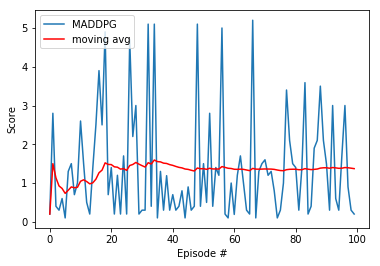

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores, label='MADDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='moving avg')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc='upper left');
plt.show()

In [1]:
#env.close()